## This is an exploration of some company sales data
Huge thanks to freeCodeCamp.org for the dataset

In [1]:
# Import my libraries
import os
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Change to the downloads directory
os.chdir("Downloads")

In [3]:
df = pd.read_csv("sales_data.csv")

In [4]:
# Preview the dataframe
df.head(10)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
5,2016-05-15,15,May,2016,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,297,225,522
6,2014-05-22,22,May,2014,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,199,180,379
7,2016-05-22,22,May,2016,47,Adults (35-64),F,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,100,90,190
8,2014-02-22,22,February,2014,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,22,45,120,1096,990,2086
9,2016-02-22,22,February,2016,35,Adults (35-64),M,Australia,Victoria,Accessories,Bike Racks,Hitch Rack - 4-Bike,21,45,120,1046,945,1991


In [5]:
# First we check for any missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Date - 0.0%
Day - 0.0%
Month - 0.0%
Year - 0.0%
Customer_Age - 0.0%
Age_Group - 0.0%
Customer_Gender - 0.0%
Country - 0.0%
State - 0.0%
Product_Category - 0.0%
Sub_Category - 0.0%
Product - 0.0%
Order_Quantity - 0.0%
Unit_Cost - 0.0%
Unit_Price - 0.0%
Profit - 0.0%
Cost - 0.0%
Revenue - 0.0%


In [6]:
# Drop any duplicates
df = df.drop_duplicates()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              112036 non-null  object
 1   Day               112036 non-null  int64 
 2   Month             112036 non-null  object
 3   Year              112036 non-null  int64 
 4   Customer_Age      112036 non-null  int64 
 5   Age_Group         112036 non-null  object
 6   Customer_Gender   112036 non-null  object
 7   Country           112036 non-null  object
 8   State             112036 non-null  object
 9   Product_Category  112036 non-null  object
 10  Sub_Category      112036 non-null  object
 11  Product           112036 non-null  object
 12  Order_Quantity    112036 non-null  int64 
 13  Unit_Cost         112036 non-null  int64 
 14  Unit_Price        112036 non-null  int64 
 15  Profit            112036 non-null  int64 
 16  Cost              112036 non-null  int

In [8]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000
mean,15.665607,2014.400925,35.919508,11.904254,267.819603,453.850628,286.035194,471.103333,757.138527
std,8.781485,1.273327,11.016543,9.564877,550.218722,922.751848,454.852634,886.971635,1312.061623
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,64.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,25.000000,103.000000,112.000000,226.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,360.000000,442.000000,806.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [9]:
# Look at differnt data types in the dataframe
df.dtypes

Date                object
Day                  int64
Month               object
Year                 int64
Customer_Age         int64
Age_Group           object
Customer_Gender     object
Country             object
State               object
Product_Category    object
Sub_Category        object
Product             object
Order_Quantity       int64
Unit_Cost            int64
Unit_Price           int64
Profit               int64
Cost                 int64
Revenue              int64
dtype: object

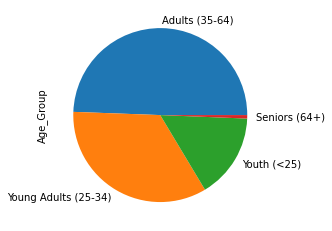

In [10]:
# Pie graph of the age group range 
age_group = df['Age_Group'].value_counts()

fig, ax = plt.subplots(figsize = (12,4))

ax = age_group.plot(kind = 'pie')

plt.show()

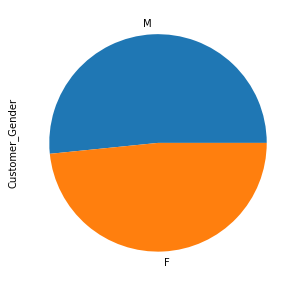

In [11]:
# Show percent of gender
fig, ax = plt.subplots(figsize = (5,5))

ax = df['Customer_Gender'].value_counts().plot(kind = 'pie')

In [12]:
# Lets look at the correlation
correlation = df.corr()
correlation

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007435,-0.015186,-0.002845,0.003520,0.003578,0.004714,0.003493,0.003995
Year,-0.007435,1.000000,0.040879,0.124091,-0.217431,-0.213538,-0.181349,-0.215449,-0.208514
Customer_Age,-0.015186,0.040879,1.000000,0.027376,-0.021401,-0.020301,0.004388,-0.016012,-0.009303
Order_Quantity,-0.002845,0.124091,0.027376,1.000000,-0.516289,-0.516387,-0.238770,-0.340386,-0.312880
Unit_Cost,0.003520,-0.217431,-0.021401,-0.516289,1.000000,0.997891,0.740623,0.829557,0.817544
Unit_Price,0.003578,-0.213538,-0.020301,-0.516387,0.997891,1.000000,0.749450,0.825965,0.818176
Profit,0.004714,-0.181349,0.004388,-0.238770,0.740623,0.749450,1.000000,0.902109,0.956508
Cost,0.003493,-0.215449,-0.016012,-0.340386,0.829557,0.825965,0.902109,1.000000,0.988748
Revenue,0.003995,-0.208514,-0.009303,-0.312880,0.817544,0.818176,0.956508,0.988748,1.000000


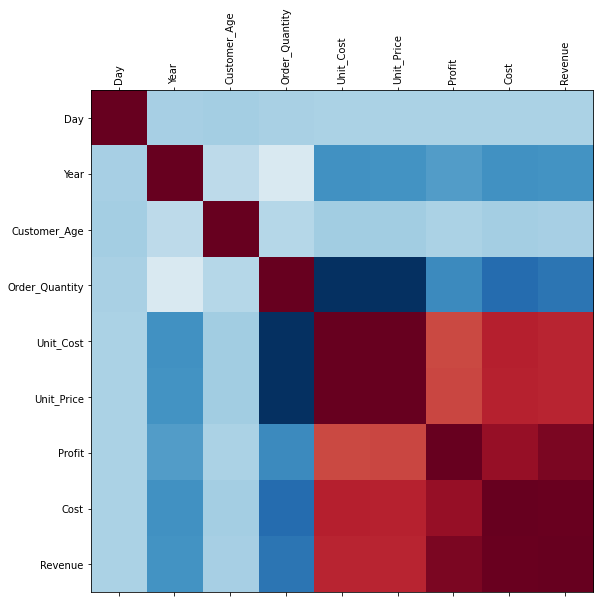

In [13]:
# Create a correlation matrix to uncover some correlations
fig = plt.figure(figsize = (9,9))
plt.matshow(correlation, cmap = 'RdBu_r', fignum = fig.number)
plt.xticks(range(len(correlation)), correlation.columns, rotation = 'vertical')
plt.yticks(range(len(correlation)), correlation.columns)
plt.show()

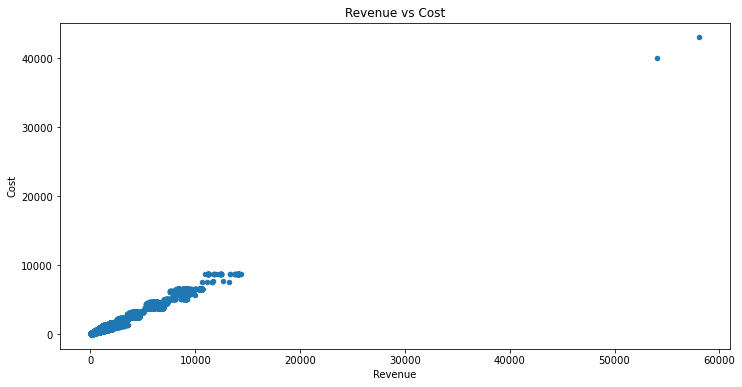

In [14]:
df.plot(kind = 'scatter', x = 'Revenue', y = 'Cost', figsize = (12,6))
plt.title("Revenue vs Cost")
plt.show()

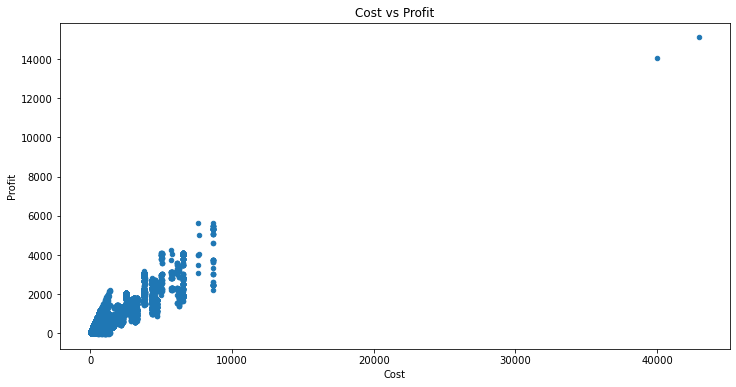

In [15]:
# Lets look at the calculated cost of the units
df.plot(kind = 'scatter', x = 'Cost', y = 'Profit', figsize = (12,6))
plt.title("Cost vs Profit")
plt.show()

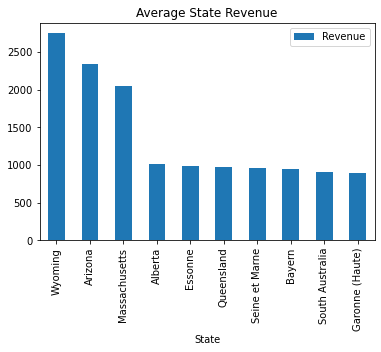

In [16]:
# Now lets look at the average revenue of each state
state_revenue = df.groupby('State', as_index=False).Revenue.mean().sort_values('Revenue', ascending = False)
state_revenue[:10].plot(kind = 'bar', x = 'State', title = 'Average State Revenue')
plt.show()

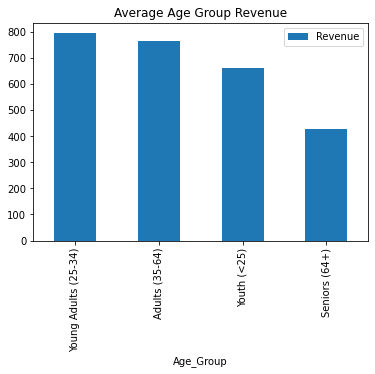

In [17]:
# Average revenue by age group
age_revenue = df.groupby('Age_Group', as_index=False).Revenue.mean().sort_values('Revenue', ascending = False)
age_revenue.plot(kind = 'bar', x = 'Age_Group', title = "Average Age Group Revenue")
plt.show()

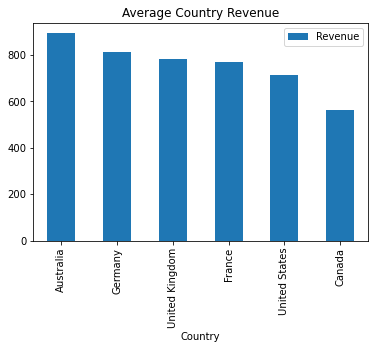

In [18]:
# Average revenue per country
country_revenue = df.groupby('Country', as_index = False).Revenue.mean().sort_values('Revenue', ascending = False)
country_revenue[:10].plot(kind = 'bar', x = 'Country', title = 'Average Country Revenue')
plt.show()

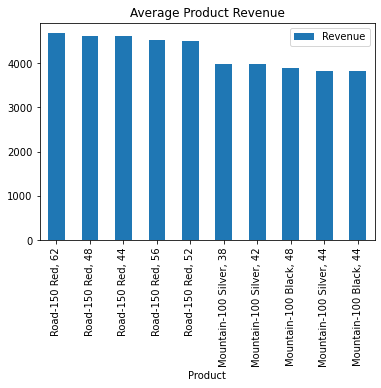

In [19]:
# Average revenue per product
product_revenue = df.groupby('Product', as_index = False).Revenue.mean().sort_values('Revenue', ascending = False)
product_revenue[:10].plot(kind = 'bar', x = 'Product', title = 'Average Product Revenue')
plt.show()

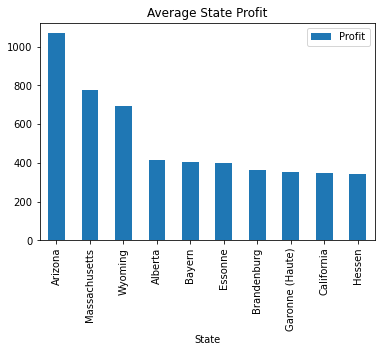

In [20]:
# Average profit per state
state_profit = df.groupby('State', as_index=False).Profit.mean().sort_values('Profit', ascending = False)
state_profit[:10].plot(kind = 'bar', x = 'State', title = 'Average State Profit')
plt.show()

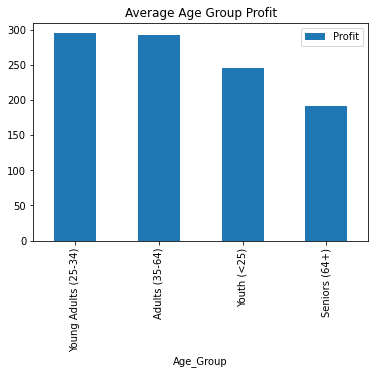

In [21]:
# Average profit per Age Group
age_profit = df.groupby('Age_Group', as_index = False).Profit.mean().sort_values('Profit', ascending = False)
age_profit.plot(kind = 'bar', x = 'Age_Group', title = 'Average Age Group Profit')
plt.show()

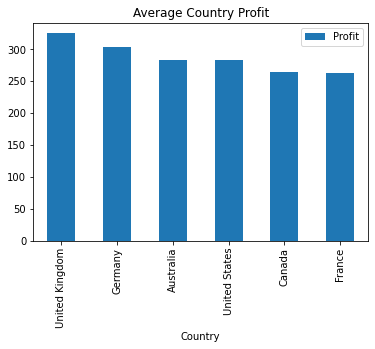

In [22]:
# Average profit per Country
country_profit = df.groupby('Country', as_index = False).Profit.mean().sort_values('Profit', ascending = False)
country_profit[:10].plot(kind = 'bar', x = 'Country', title = 'Average Country Profit')
plt.show()

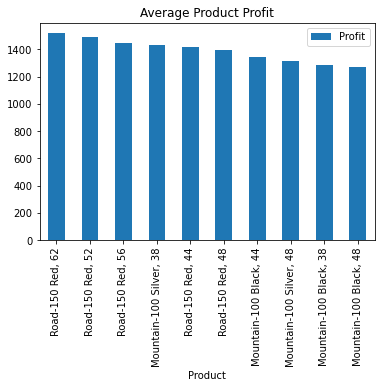

In [23]:
# Average profit per Product
product_revenue = df.groupby('Product', as_index = False).Profit.mean().sort_values('Profit', ascending = False)
product_revenue
product_revenue[:10].plot(kind = 'bar', x = 'Product', title = 'Average Product Profit')
plt.show()